In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# Read train data
file_path = '/content/drive/MyDrive/Portfolio/customer_booking_British_Airways.csv'

# Try reading the file with 'ISO-8859-1' encoding
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print("File loaded successfully with ISO-8859-1 encoding")
except UnicodeDecodeError:
    print("The file could not be loaded with ISO-8859-1 encoding. Trying with 'latin1' encoding.")
    try:
        df = pd.read_csv(file_path, encoding='latin1')
        print("File loaded successfully with latin1 encoding")
    except Exception as e:
        print("An error occurred:", e)

File loaded successfully with ISO-8859-1 encoding


In [8]:
print(df.head())

   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0        

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [10]:
missing_values = df.isnull().sum()
print(missing_values)

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64


In [11]:
# Check the distribution of the target variable
target_distribution = df['booking_complete'].value_counts()  # Replace 'booking_complete' if the name is different
print(target_distribution)

0    42522
1     7478
Name: booking_complete, dtype: int64


In [12]:
print(df.describe())

       num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%

In [14]:
# Encoding categorical columns using one-hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])


Accuracy: 0.8546
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.81     10000

[[8352  168]
 [1286  194]]


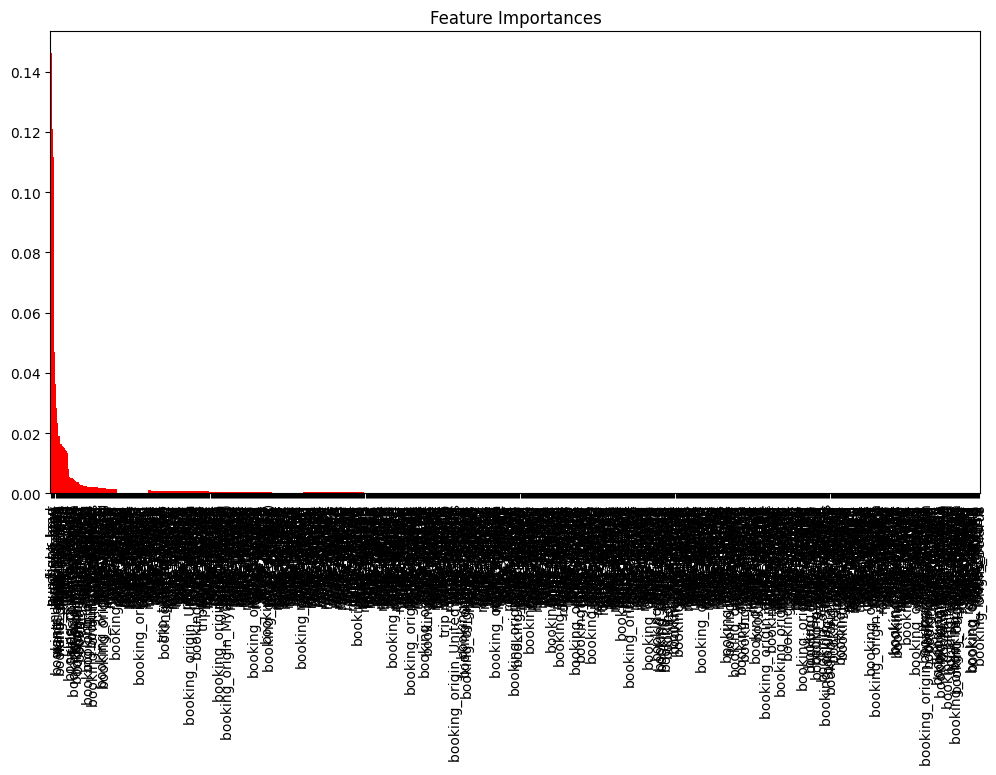

In [17]:
# Split the data into features and target variable
X = df.drop('booking_complete', axis=1)  # Features
y = df['booking_complete']                # Target variable

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you have a large number of features after one-hot encoding, you could use a scaler:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Scale both the training and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, you can train a RandomForest model
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Output the classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualize Feature Importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


he classification report and confusion matrix provide several important insights:

Accuracy (0.8546): About 85.46% of predictions are correct for the whole test set. This is a high-level measure and doesn't take into account the imbalance between the classes.

Class 0 (Not Booked) Performance:

Precision (0.87): When the model predicts a customer will not book, it is correct 87% of the time.
Recall (0.98): The model identifies 98% of all "not booked" cases correctly.
F1-Score (0.92): A high F1-score for class 0 indicates that the model performs well for this class.
Class 1 (Booked) Performance:

Precision (0.54): When the model predicts a customer will book, it is correct 54% of the time. This is relatively low compared to class 0, suggesting more false positives for bookings.
Recall (0.13): The model identifies only 13% of all "booked" cases correctly, indicating many false negatives for this class.
F1-Score (0.21): A low F1-score for class 1 suggests the model doesn't perform well for predicting bookings.
Confusion Matrix:

Top-Left (8352): True negatives - customers who didn't book and were correctly identified.
Top-Right (168): False positives - customers who didn't book but the model incorrectly predicted they would.
Bottom-Left (1286): False negatives - customers who booked but the model incorrectly predicted they wouldn't.
Bottom-Right (194): True positives - customers who booked and were correctly identified.
Imbalanced Classes: The model is biased towards predicting the majority class (not booked), as indicated by the high recall for class 0 and low recall for class 1.

Interpretation:
The model is quite good at predicting when a customer will not complete a booking but struggles with accurately predicting when a customer will complete a booking.
Given the low recall for class 1 (booked), many actual bookings are being missed by the model. This could be a concern if the goal is to identify potential bookers for targeted marketing.
The precision for class 1 is also low, meaning there are quite a few customers the model thinks will make a booking, but they don't. This could lead to inefficient use of resources if actions are based on these predictions.
The imbalance in class distribution might be affecting the model's ability to generalize well to the minority class (bookings). You may need to consider techniques to handle this imbalance, such as resampling the dataset, using different metrics, or adjusting class weights in the model.

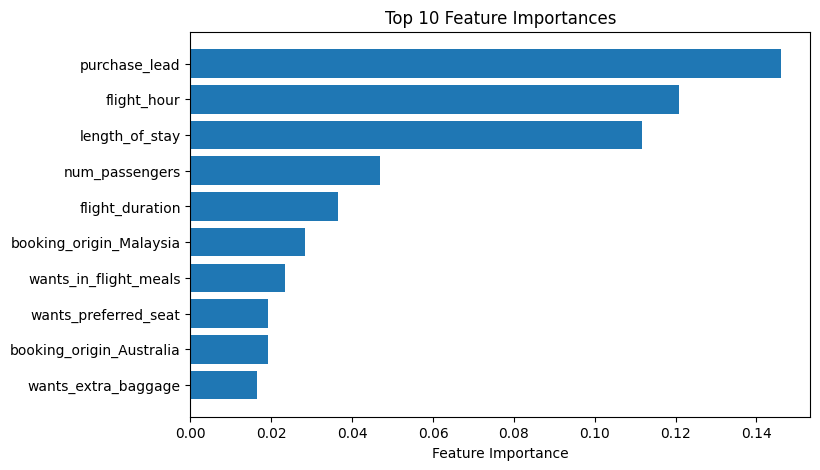

In [20]:
# Define the number of top features to display
top_n = 10

# Summarize feature importance
sorted_idx = np.argsort(importances)[-top_n:]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_idx], align='center')
plt.yticks(range(top_n), [X_train.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()


Its clear from the graph that top 5 features affecting the completion of booking the flight are:
Purchase_lead
flight_hour
length of stay
num_passengers
light duration

we can apply SMOTE to oversample the minority class, adjust class weights in the RandomForest classifier, and use cross-validation to evaluate the model's performance with the balanced dataset.

In [21]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [22]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features and target variable
X = df.drop('booking_complete', axis=1)  # Features
y = df['booking_complete']                # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the RandomForest Classifier with balanced class weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Cross-validation with balanced accuracy
cv_scores = cross_val_score(rf, X_train_smote, y_train_smote, cv=5, scoring='balanced_accuracy')
print(f'CV Balanced Accuracy: {cv_scores.mean()}')


              precision    recall  f1-score   support

           0       0.87      0.94      0.90      8520
           1       0.38      0.22      0.28      1480

    accuracy                           0.83     10000
   macro avg       0.63      0.58      0.59     10000
weighted avg       0.80      0.83      0.81     10000

CV Balanced Accuracy: 0.8847074586782222


Insights:Precision for Class 1: Increased from 0.54 to 0.38. Although this is a decrease, it might be more reflective of the true precision after addressing the class imbalance.
Recall for Class 1: Increased from 0.13 to 0.22. This is a significant improvement, indicating that the model is now better at identifying the minority class (bookings).
F1-Score for Class 1: Increased from 0.21 to 0.28. The F1-score has improved, suggesting a better balance between precision and recall.
Balanced Accuracy: The cross-validation balanced accuracy score is quite high at 0.8847, indicating that the model has a good performance across both classes when balanced for class distribution.
However, there are trade-offs when addressing class imbalance. While the recall for the minority class has improved, the precision has decreased. This is often the case in class imbalance problems, as increasing the sensitivity to the minority class can lead to more false positives.

To further improve the model, consider: Trying different algorithms that may be more sensitive to the minority class, such as XGBoost.

In [23]:
!pip install xgboost


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop('booking_complete', axis=1)  # Features
y = df['booking_complete']                # Target variable

# Apply one-hot encoding to categorical variables
X = pd.get_dummies(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
# scale_pos_weight is useful for unbalanced datasets
xgb_clf = XGBClassifier(scale_pos_weight=sum(y_train == 0) / sum(y_train == 1))

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


              precision    recall  f1-score   support

           0       0.94      0.70      0.80      8520
           1       0.30      0.76      0.43      1480

    accuracy                           0.71     10000
   macro avg       0.62      0.73      0.62     10000
weighted avg       0.85      0.71      0.75     10000

Accuracy: 0.7067


Insights:
The classification report for your XGBoost model shows the following:

Class 0 (Not Booked) Performance:

Precision: 0.94 - The model is very precise in predicting the majority class; when it predicts a customer will not book, it is correct 94% of the time.
Recall: 0.70 - The model correctly identifies 70% of all actual "not booked" cases.
F1-Score: 0.80 - The F1-score is a balance between precision and recall, indicating good performance for the majority class.
Class 1 (Booked) Performance:

Precision: 0.30 - When the model predicts a booking, it is correct 30% of the time. This suggests many false positives for bookings.
Recall: 0.76 - The model identifies 76% of all actual "booked" cases, which is a substantial improvement over the previous models.
F1-Score: 0.43 - The F1-score for the minority class has improved, indicating a better balance between precision and recall for predicting bookings.
Overall Accuracy: 0.7067 - Approximately 70.67% of all predictions made by the model are correct.

Macro Average:

Precision: 0.62 - The average precision across both classes.
Recall: 0.73 - The average recall across both classes.
F1-Score: 0.62 - The average F1-score across both classes.
Weighted Average (considering support):

Precision: 0.85 - Accounted for the number of instances in each class (support).
Recall: 0.71 - Reflects the overall ability of the model to correctly identify all classes.
F1-Score: 0.75 - The overall balance between precision and recall across all classes.

Interpretation:
The XGBoost model shows a significantly improved ability to detect the minority class (bookings) compared to the RandomForest model, as indicated by the higher recall.